___
___

##  introducción

El análisis numérico es el estudio de algoritmos para la solución de problemas de matemática continua, y en este trabajo es justamente lo que se hará. Se buscará resolver una ecuación diferencial ordinaria de primer orden, es decir, una ecuación diferencial expresada en derivadas totales  en donde solo intervienen las derivadas de primer orden.

Una importante porción de los problemas que deben ser resueltos por ingenieros se pueden representar mediante estas ecuaciones, por ejemplo, la ecuación de un circuito RLC, y si bien existen muchos métodos analíticos para resolverlas, estos no siempre son aplicables. Por lo tanto, en una gran cantidad de casos será necesario aplicar métodos numéricos para encontrar soluciones aproximadas.

A lo largo de la materia se vieron muchos métodos capaces de resolver este tipo de ecuaciones, en este caso, se asignó solucionar la ecuación mediante el método conocido como "punto medio", sin embargo, se mostraran también otros métodos para poder comparar los resultados y obtener una conclusión.


___
___

## Método de Runge-Kutta: Punto medio

Se comenzará haciendo un breve repaso teórico de los métodos de Runge-Kutta y, en particular, el de punto medio que resulta ser una aplicación del método de Runge-Kutta de orden de convergencia cuadrático.

Los métodos de Runge-Kutta tienen lugar debido a que, si bien los métodos de Taylor para ecuaciones diferenciales resultan muy instructivos y tienen un buen orden de convergencia, son muy poco prácticos al momento de implementarse a un algoritmo de cálculo. El motivo principal de esto es la necesidad de calcular las derivadas, que generalmente no es sencillo y trae aparejado una gran cantidad de operaciones y, por lo tanto, un gran costo computacional.

Estos métodos surgen a partir de aproximar el polinomio de Taylor para una variable mediante polinomios de Taylor de dos variables.

Se obtiene del desarrollo de Taylor para una función de dos variables la siguiente expresión:


$$f(t + α, y + β) = f(t, y) +  α \frac{∂f(t, y)}{∂t} +β \frac{∂f(t, y)}{∂y} $$


y del método de Taylor se obtiene un valor de $T^{<2>}$ de:

$$ T ^{<2>}(t, y) = f(t, y) + \frac{h}{2!} [ \frac{∂f(t, y)}{∂t} + \frac {∂f(t, y)}{∂y} f(t, y)] $$

Si proponemos que:

$$ T ^{<2>}(t, y) = a_1 \cdot f(t,y) + a_2 \cdot f(t + α, y + β)$$

Para el caso particular de punto medio donde $a_1 = 0$ y $a_2=1$ se obtiene:

$$  f(t + α, y + β)=   f(t, y) +  α \frac{∂f(t, y)}{∂t} +β \frac{∂f(t, y)}{∂y} = f(t, y) + \frac{h}{2!} [ \frac{∂f(t, y)}{∂t} + \frac {∂f(t, y)}{∂y} f(t, y)] $$

$$ \Rightarrow α = \frac{h}{2}$$
$$ \Rightarrow β = \frac{h}{2} \cdot f(t,y)$$

Finalmente, el método resultante es:

$$ w_{i+1} = w_i + h \cdot T^{<2>}\cdot f(t,y) $$


$$ w_{i+1} = w_i + h \cdot f (t_i + \frac{h}{2}, w_i +\frac {h}{2}f(t_i,w_i)) $$


---
---


## Ecuación Diferencial a Resolver

La ecuación diferencial ordinaria que será resuelta a lo largo de este trabajo es la siguiente:

$$\frac {dy_1}{dt} = \frac {y_1 - t}{ y_1 +t}$$

* Intervalo:  $a ≤ t ≤ b $ siendo [a,b] los valores $a=-1.50$, $b=3.50$

* Valor inicial: $y_1(a)=4,0166114122$

* Paso: $h=0.05$.


___
___

## Desarrollo

El desarrollo de este trabajo fue abordado de una manera muy similar al trabajo practico integrador realizado en la materia. Se decidió modelar el problema con el paradigma de programación orientada a objetos ya que este aporta características de suma importancia al modelo, como la abstracción, el encapsulamiento, la reutilización y la posibilidad de tener una solución escalable.

Se comenzó definiendo una clase llamada "SolucionEDO" que tiene como objetivo modelar el problema de la solución de una ecuación diferencial ordinaria de primer orden en su totalidad. Es importante notar que se delibero que, parámetros como la función a resolver, los extremos del intervalo y el paso, se carguen al programa de forma externa para, de esta forma, no perder generalidad en la solución del problema y tener la posibilidad de reutilizarlo para la solución de otro problema de características similares.

Se procedió definiendo métodos que solucionan la ecuación diferencial por medio de Punto Medio , Runge Kuta de orden 4 y, por último, Adam Moulton de orden dos, para poder comparar los resultados y obtener una conclusión acerca de los mismos.


In [ ]:
######## Librerias #########
import numpy as np #librería para operaciones algebraicas y numéricas
import pandas as pd #librería para manejo de datos
import matplotlib
import matplotlib.pyplot as plt
from scipy import optimize as op

##### Implemento la clase que solucionas EDO de primer orden #####

class SolucionEDO:

    ####Creador#####
    def __init__ (self):
        self.a=float(input ("Ingrese el valor del extremo inferior del intervalo:  "))
        self.b=float(input ("Ingrese el valor del extremo superior del intervalo:  "))
        self.h=float(input ("Ingrese el paso con el cual quiere resolver la ecuacion diferencial:  "))
        self.y0=float(input ("Ingrese el valor incial de la funcion:  "))

    #### Seteador de la funcion ####
    def CargaFuncion(self, f):
        self.fxy=f


    ##### Metodo de Punto Medio #####

    def SolucionPtoMedio(self):

        #cargo la funcion
        self.CargaFuncion(fxy)

        N=int((self.b-self.a)/self.h)
        t=np.linspace(self.a,self.b,N+1)
        w=np.zeros(N+1)
        w[0]= self.y0

        for i in range(1,N+1):
            w[i]=w[i-1]+self.h*self.fxy(t[i-1]+self.h/2,w[i-1]+(self.h/2)*self.fxy(t[i-1],w[i-1]))

        #devuelo los resultados#
        resultadoPM=pd.DataFrame({'t':t,'Y':w})
        return resultadoPM


    #### Metodo Runge Kuta orden 4 ####

    def SolucionRK4(self):

        #cargo la funcion
        self.CargaFuncion(fxy)
        a=self.a
        b=self.b
        h=self.h

        N=int((b-a)/h)
        t=np.linspace(a,b,N+1)
        w=np.zeros(N+1)
        w[0]= self.y0
        for i in range(1,N+1):
            k1=h*self.fxy(t[i-1],w[i-1])
            k2=h*self.fxy(t[i-1]+h/2,w[i-1]+0.5*k1)
            k3=h*self.fxy(t[i-1]+h/2,w[i-1]+0.5*k2)
            k4=h*self.fxy(t[i-1]+h,w[i-1]+k3)
            w[i]=w[i-1]+(1/6)*(k1+2*k2+2*k3+k4)

        #devuelo los resultados#
        resultadoRK4=pd.DataFrame({'t':t,'Y':w})
        return resultadoRK4


    ####Metodo del Adams Moulton####

    def SolucionAdamsM2(self):

        #cargo la funcion
        self.CargaFuncion(fxy)
        a=self.a
        b=self.b
        h=self.h

        N=int((b-a)/h)
        t=np.linspace(a,b,N+1)
        w=np.zeros(N+1)
        w[0]= self.y0
        def aux(wi,args):
            ti,w0,h,t0=args
            return np.abs(w0+0.5*h*(self.fxy(ti,wi)+self.fxy(t0,w0))-wi)
        for i in range(1,N+1):
            initial_guess = w[i-1]
            w[i] = op.minimize(aux, initial_guess,args=[t[i],w[i-1],h,t[i-1]])['x']

        #devuelo los resultados#
        resultadoAM2=pd.DataFrame({'t':t,'Y':w})
        return resultadoAM2


    def CompararMetodos(self):

        resultadoPM=self.SolucionPtoMedio()
        resultadoRK4=self.SolucionAdamsM2()
        resultadoAM2=self.SolucionRK4()

        #grafico
        plt.figure(figsize=(20,10))
        plt.plot(resultadoPM['t'],resultadoPM['Y'])
        plt.plot(resultadoRK4['t'],resultadoRK4['Y'])
        plt.plot(resultadoAM2['t'],resultadoAM2['Y'])
        plt.xlabel('t')
        plt.ylabel('w')
        plt.title('Comparación de métodos - EDO ')
        plt.legend(['Pto. Medio','Runge Kutta 4','Adams Moulton 2'],fontsize=10);


___
___

## Análisis de resultados

En esta sección se mostrarán los resultados obtenidos para el método pedido (punto medio) y luego se comparará con otros métodos conocidos para poder obtener conclusiones.


In [ ]:
##### Cargo los datos del problema #####
def fxy(x,y):
    return (y-x)/(y+x)

####Solucion por medio del metodo de punto medio####
Ejemplo=SolucionEDO()
print("\n\n El resultado obtenido mediante el método de punto medio se puede observar en la siguiente tabla: ")
Ejemplo.SolucionPtoMedio()

Ingrese el valor del extremo inferior del intervalo:  -1.5
Ingrese el valor del extremo superior del intervalo:  3.5
Ingrese el paso con el cual quiere resolver la ecuacion diferencial:  0.05
Ingrese el valor incial de la funcion:  4.0166114122


 El resultado obtenido mediante el metodo de punto medio se puede observar en la siguiente tabla: 


,t,Y
0,-1.50,4.016611
1,-1.45,4.123421
2,-1.40,4.225229
3,-1.35,4.322642
4,-1.30,4.416151
...,...,...
96,3.30,8.312903
97,3.35,8.334359
98,3.40,8.355562
99,3.45,8.376515


Ahora se procederá a comparar los resultados obtenidos con el método de punto medio, el método de Runge-Kutta de orden 4 y el de Adams Moulton de orden 2. Se eligieron estos métodos en particular para ver como cambiaba la función al tener un método de orden de convergencia mayor como es el caso del Runge-Kutta de orden 4 y para observar los cambios al resolver la función con un método implícito (Adams-Moulton) que, como sabemos, no tendrá una estabilidad condicionada.

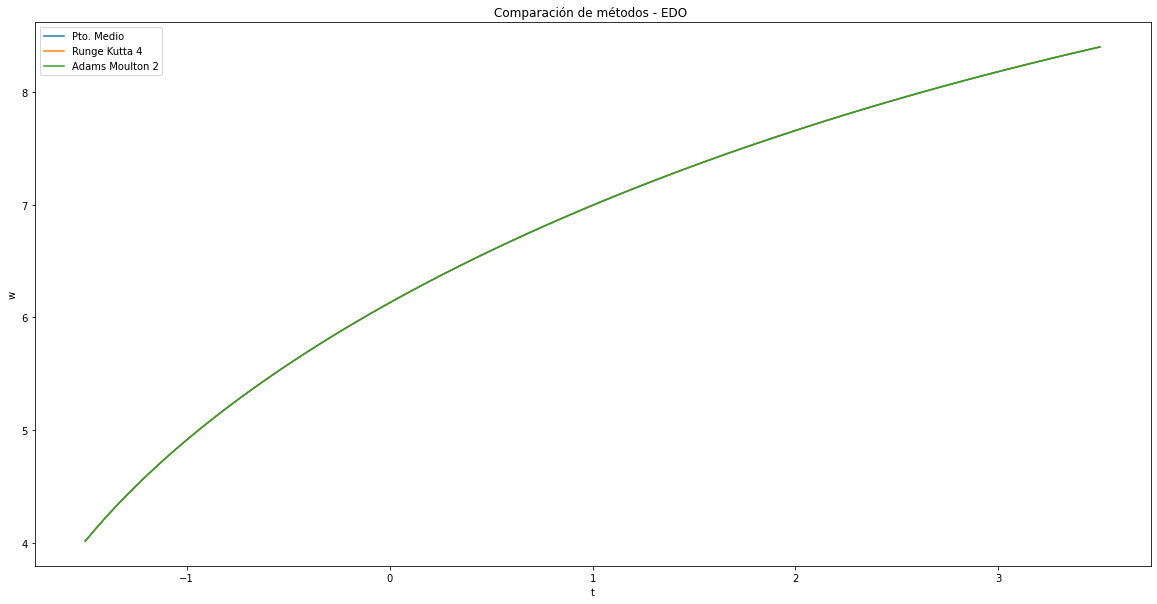

In [ ]:
#### Comparacion con otros metodos ####
Ejemplo.CompararMetodos()


Se observa en el grafico que con el paso propuesto en el trabajo ($h=0.05$), la diferencia entre los resultados es muy pequeña y, por lo tanto, se puede concluir que con el método de punto medio el resultado obtenido es satisfactorio.

Otra prueba que se puede hacer es aumentar 10 veces el paso y ver nuevamente la diferencia obtenida con cada método. El grafico obtenido se puede ver a continuación:


Ingrese el valor del extremo inferior del intervalo:  -1.5
Ingrese el valor del extremo superior del intervalo:  3.5
Ingrese el paso con el cual quiere resolver la ecuacion diferencial:  0.5
Ingrese el valor incial de la funcion:  4.0166114122


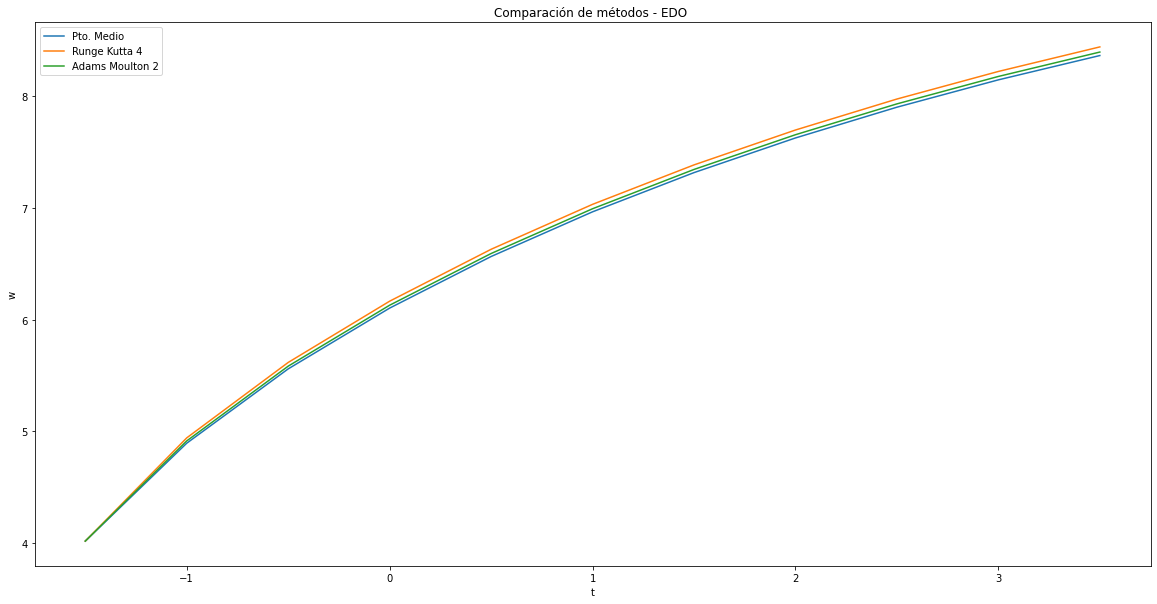

In [ ]:
Ejemplo2=SolucionEDO()
Ejemplo2.CompararMetodos()

Al aumentar el paso se nota que la diferencia entre cada método crece, sin embargo, sigue sin ser una diferencia muy grande. Se debería ver para cada caso de aplicación en particular si esta diferencia entre los métodos resulta significativa, pero en un principio podemos volver a decir que aumentando el paso 10 veces el resultado con el método de paso medio sigue siendo satisfactoria.

___
___

## Conclusión

Finalmente podemos concluir que la realización de este trabajo posibilito el traslado de los conceptos teóricos adquiridos durante la materia acerca de ecuaciones diferenciales a un ejercicio practico en concreto. Asimismo, se obtuvo experiencia en el uso de la herramienta "Jupyter notebook" y en la programación en lenguaje "Python".

En relación a los resultados obtenidos, luego de resolver la ecuación diferencial ordinaria por el método de punto medio, otro método de Runge-Kutta de orden superior y, por último, un método del mismo orden de convergencia pero implícito, se puede llegar a la conclusión de que para los valores dados en el enunciado del ejercicio, el método de punto medio brinda un resultado satisfactorio.